In [25]:
import pandas
import matplotlib.pyplot as plt

df = pandas.read_csv("npp_own_data_monthly.csv")
#drop npp 
df = df.drop(['npp'], axis=1)
df['carbon'] = df['carbon'] / 1000
# group by year and location. Sum the total_carbon column
df = df.groupby(['year', 'location']).carbon.sum().reset_index()
#change total_carbon name to total_carbon_own
df = df.rename(columns={'carbon': 'carbon_own'})

df_gee = pandas.read_csv("npp_gee_data.csv")
df_gee = df_gee.drop(['npp'], axis=1)
df_gee = df_gee.rename(columns={'carbon': 'carbon_gee'})

# show year, location, total_carbon_own, total_carbon_gee in same df
df = df.merge(df_gee, on=['year', 'location'])

/var/folders/l4/7twxq9yj3k93p3lj5m1h2xx00000gn/T/ipykernel_87079/2120860483.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(subset['year'], subset['carbon_own'], 'o-', color=colors[idx], label=f"{location} - Own", linestyle='dotted')


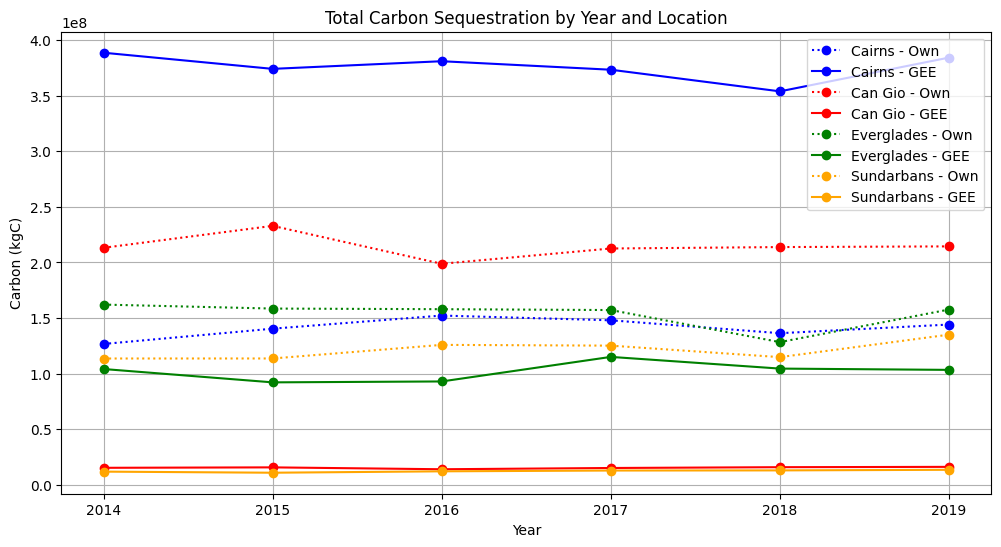

In [26]:
locations = df['location'].unique()
colors = ['blue', 'red', 'green', 'orange'] # assuming a max of 4 unique locations for now
# Plotting with unique colors for each location and integer year labels
# Plotting with custom legend labels
plt.figure(figsize=(12, 6))

for idx, location in enumerate(locations):
    subset = df[df['location'] == location]
    plt.plot(subset['year'], subset['carbon_own'], 'o-', color=colors[idx], label=f"{location} - Own", linestyle='dotted')
    plt.plot(subset['year'], subset['carbon_gee'], 'o-', color=colors[idx], label=f"{location} - GEE")

plt.xlabel('Year')
plt.ylabel('Carbon (kgC)')
plt.title('Total Carbon Sequestration by Year and Location')
plt.xticks(df['year'].unique())  # Set x-ticks to be the unique years in the dataset
plt.legend()
plt.grid(True)
plt.show()